## Gradient Boosting Implementation Regressor

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

In [3]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=13)
params= {'n_estimators': 500,
         'max_depth': 4,
         'min_samples_split': 5,
          'learning_rate': 0.01,
           'loss': 'ls'}

In [6]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean suqred erroe (MSE) on test set: {:.4f}".format(mse))
r_score=r2_score(y_test,reg.predict(X_test))
print('r_score',r_score)

The mean suqred erroe (MSE) on test set: 3052.5008
r_score 0.41379528338602134


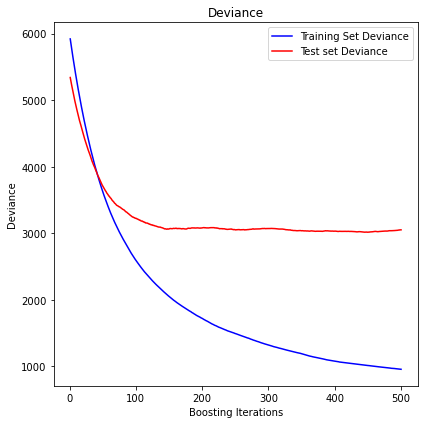

In [7]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)
    
fig = plt.figure(figsize=(6,6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

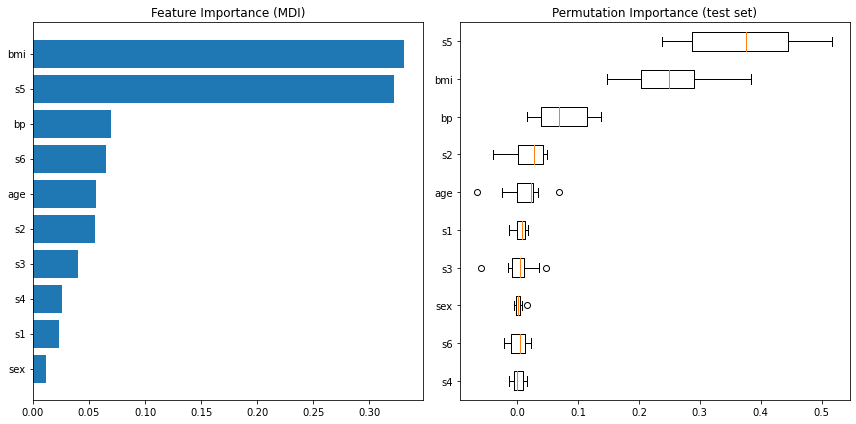

In [21]:
feature_importance=reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')
                                                 
result = permutation_importance(reg, X_test, y_test, n_repeats=10,random_state=42,n_jobs=2)  

sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2,2)

                                                 
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(diabetes.feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
params1= {'n_estimators': [100,500],
         'max_depth': [2,3],
         'min_samples_split': [3,4],
          'learning_rate': [0.1,0.10],
           'loss': ['ls']}

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
gr1=GridSearchCV(estimator=reg,param_grid=params1)
gr1.fit(X_train,y_train)
gr1.best_params_,gr1.best_score_

({'learning_rate': 0.1,
  'loss': 'ls',
  'max_depth': 2,
  'min_samples_split': 4,
  'n_estimators': 100},
 0.4684038950061612)

In [11]:
mse = mean_squared_error(y_test, gr1.predict(X_test))
print("The mean suqred erroe (MSE) on test set: {:.4f}".format(mse))

The mean suqred erroe (MSE) on test set: 3040.8592


In [12]:
gr2 = GradientBoostingRegressor(learning_rate = 0.1,loss='ls',max_depth=2,min_samples_split=4,n_estimators=100)

In [13]:
gr2.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, min_samples_split=4)

In [14]:
pre=gr2.predict(X_test)
mse = mean_squared_error(y_test,pre)
print("The mean suqred erroe (MSE) on test set: {:.4f}".format(mse))
r_score=r2_score(y_test,pre)
print('r_score',r_score)

The mean suqred erroe (MSE) on test set: 3079.1316
r_score 0.40868109171305955


## Gradient Boosting Classifier

In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
df = pd.DataFrame(load_breast_cancer()['data'],
    columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [28]:
X,y = df.drop('y',axis=1),df.y
kf = KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,val_index in kf.split(X):
    X_train,X_val = X.iloc[train_index],X.iloc[val_index],
    y_train,y_val = y.iloc[train_index],y.iloc[val_index],

In [29]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [30]:
gradient_booster.fit(X_train,y_train)
print(classification_report(y_val,gradient_booster.predict(X_val)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.96      0.99      0.97        67

    accuracy                           0.96       113
   macro avg       0.97      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



## AdaBoost(Adaptive Boosting)

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [35]:
X, y = make_classification(n_samples=1000, n_features=4,
                          n_informative=2, n_redundant=0,
                          random_state=0, shuffle=False)

In [36]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [37]:
clf.fit(X,y)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [38]:
clf.predict([[0,0,0,0]])

array([1])

In [39]:
clf.score(X,y)

0.983